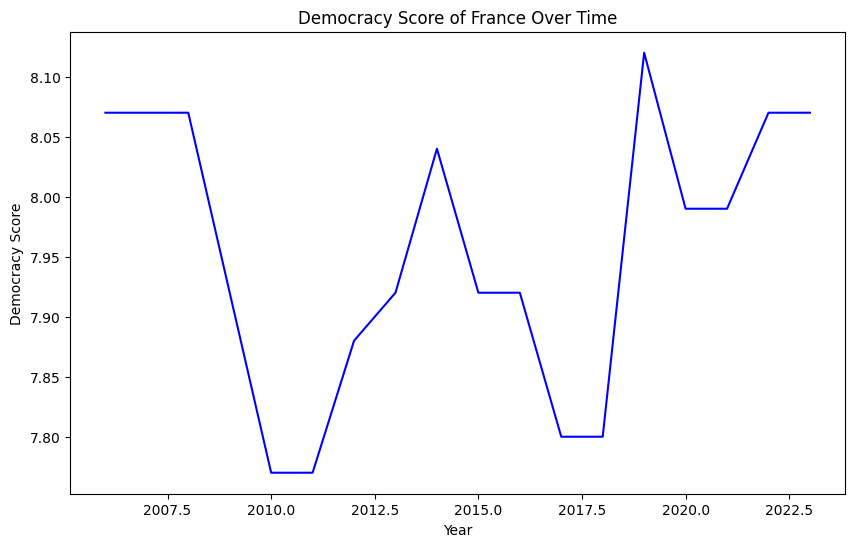

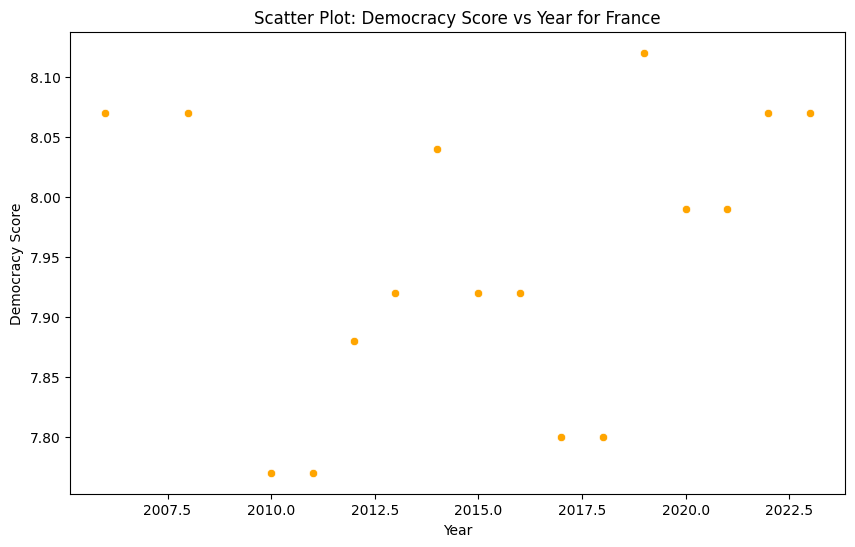

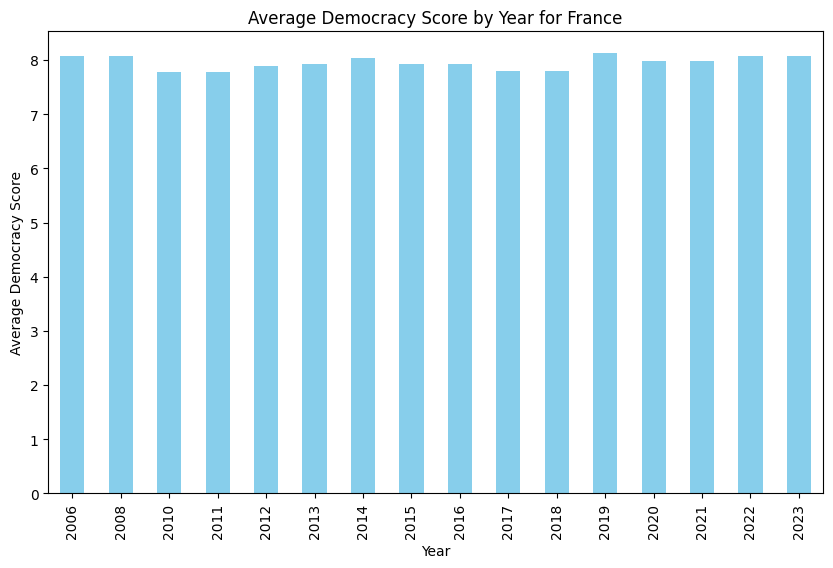

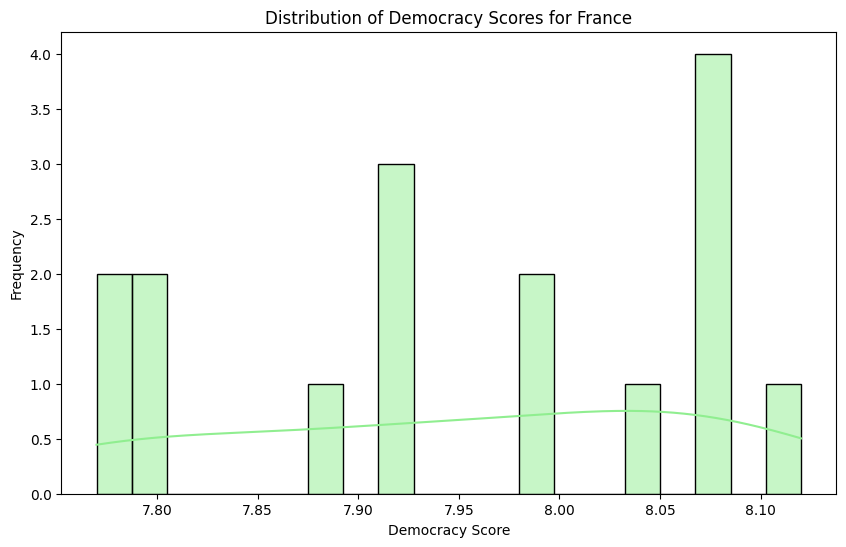

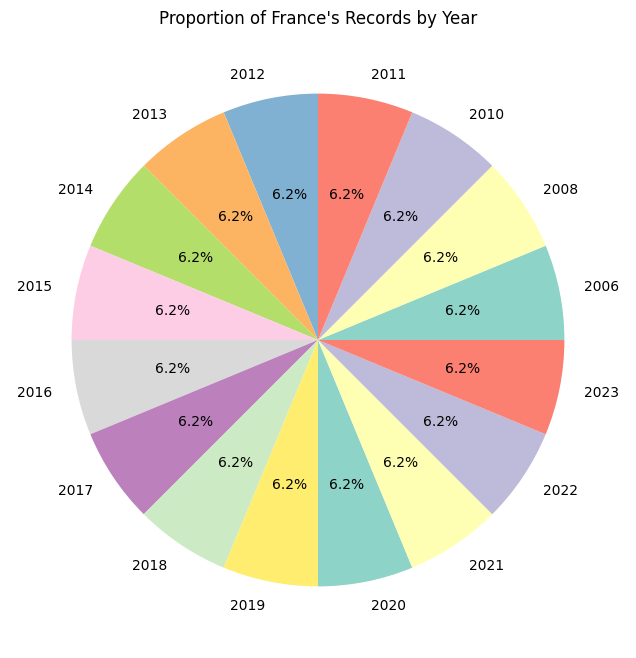

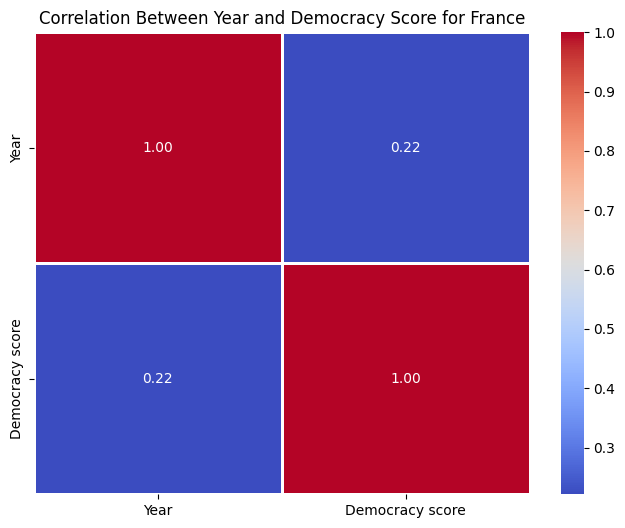

ValueError: could not convert string to float: 'France'

Error in callback <function _draw_all_if_interactive at 0x000001E5EAEC9EE0> (for post_execute), with arguments args (),kwargs {}:


TypeError: can't multiply sequence by non-int of type 'float'

TypeError: can't multiply sequence by non-int of type 'float'

<Figure size 1000x800 with 1 Axes>

In [7]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Download the dataset
path = kagglehub.dataset_download("shreyasur965/democracy-index")

# List the contents of the directory where the dataset is saved
dataset_files = os.listdir(path)

# Check if there are any files to load
if dataset_files:
    # Assuming the dataset is a CSV file and we are using the first file in the list
    csv_path = os.path.join(path, dataset_files[0])  # Replace with a specific file if necessary
    data = pd.read_csv(csv_path)

    # Drop rows where 'Code' is NaN
    data = data.dropna(subset=['Code'])

    # Filter the dataset to include only rows where the 'Entity' is 'France'
    france_data = data[data['Entity'] == 'France']

    # Visualizations for France only

    ## 1. Line Plot: Show trends of Democracy Scores over time (Year)
    if 'Year' in france_data.columns and 'Democracy score' in france_data.columns:
        plt.figure(figsize=(10, 6))
        sns.lineplot(data=france_data, x='Year', y='Democracy score', color='blue')
        plt.title("Democracy Score of France Over Time")
        plt.xlabel("Year")
        plt.ylabel("Democracy Score")
        plt.show()

    ## 2. Scatter Plot: Show relationship between 'Year' and 'Democracy score'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=france_data, x='Year', y='Democracy score', color='orange')
    plt.title("Scatter Plot: Democracy Score vs Year for France")
    plt.xlabel("Year")
    plt.ylabel("Democracy Score")
    plt.show()

    ## 3. Bar Chart: Average Democracy Score for each Year
    plt.figure(figsize=(10, 6))
    france_data.groupby('Year')['Democracy score'].mean().plot(kind='bar', color='skyblue')
    plt.title("Average Democracy Score by Year for France")
    plt.xlabel("Year")
    plt.ylabel("Average Democracy Score")
    plt.show()

    ## 4. Histogram: Distribution of 'Democracy score' for France
    plt.figure(figsize=(10, 6))
    sns.histplot(france_data['Democracy score'], kde=True, bins=20, color='lightgreen')
    plt.title("Distribution of Democracy Scores for France")
    plt.xlabel("Democracy Score")
    plt.ylabel("Frequency")
    plt.show()

    ## 5. Pie Chart: Proportion of France's records based on the years
    france_year_counts = france_data['Year'].value_counts()
    plt.figure(figsize=(8, 8))
    france_year_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("Set3", len(france_year_counts)), legend=False)
    plt.title("Proportion of France's Records by Year")
    plt.ylabel("")
    plt.show()

    ## 6. Correlation Plot: Correlation between 'Year' and 'Democracy score' for France
    if 'Year' in france_data.columns and 'Democracy score' in france_data.columns:
        correlation = france_data[['Year', 'Democracy score']].corr()
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1)
        plt.title("Correlation Between Year and Democracy Score for France")
        plt.show()

    ## 7. 3D Plot: Show Year, Democracy score, and Entity (France) on a 3D scatter plot
    if 'Year' in france_data.columns and 'Democracy score' in france_data.columns and 'Entity' in france_data.columns:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(france_data['Year'], france_data['Democracy score'], france_data['Entity'], c=france_data['Democracy score'], cmap='viridis', marker='o')

        ax.set_xlabel('Year')
        ax.set_ylabel('Democracy Score')
        ax.set_zlabel('Entity')
        ax.set_title("3D Plot: Year, Democracy Score, and Entity (France)")
        plt.show()

else:
    print("No files found in the dataset directory.")
